# 2. train model

In [15]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

## 2.1 load and inpsect data

In [16]:
X_train = np.load("../data/X_train.npy")
y_train = np.load("../data/y_train.npy")

X_val = np.load("../data/X_val.npy")
y_val = np.load("../data/y_val.npy")

X_test = np.load("../data/X_test.npy")
y_test = np.load("../data/y_test.npy")

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Dopasowanie kształtu danych do regresji liniowej
if len(X_train.shape) > 2:
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_val = X_val.reshape(X_val.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

X_train shape: (294359, 12, 13)
y_train shape: (294359, 13)


## 2.2 train the model

In [ ]:
# Tworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Predykcje
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Ewaluacja — te same metryki co w modelu LSTM
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
#WYKORZYSTANIE METRYK


TRAIN: MAE=0.0124 MSE=0.0020 RMSE=0.0452 R2=0.9496
TEST:  MAE=0.0120 MSE=0.0018 RMSE=0.0428 R2=0.9498


## Wykorzystane metryki

In [ ]:
print("TRAIN: MAE=%.4f MSE=%.4f RMSE=%.4f R2=%.4f" % (mae_train, mse_train, rmse_train, r2_train))
print("TEST:  MAE=%.4f MSE=%.4f RMSE=%.4f R2=%.4f" % (mae_test, mse_test, rmse_test, r2_test))

In [18]:
# Zachowanie formatu danych do wykresów
y_pred = y_pred_test

# Zapis modelu
import joblib
joblib.dump(model, "../models/linear_regression_weather.pkl")

['../models/linear_regression_weather.pkl']

## 2.3 evaluate on test set 

TRAIN: MAE=0.0124 MSE=0.0020 RMSE=0.0452 R2=0.9496
TEST:  MAE=0.0120 MSE=0.0018 RMSE=0.0428 R2=0.9498


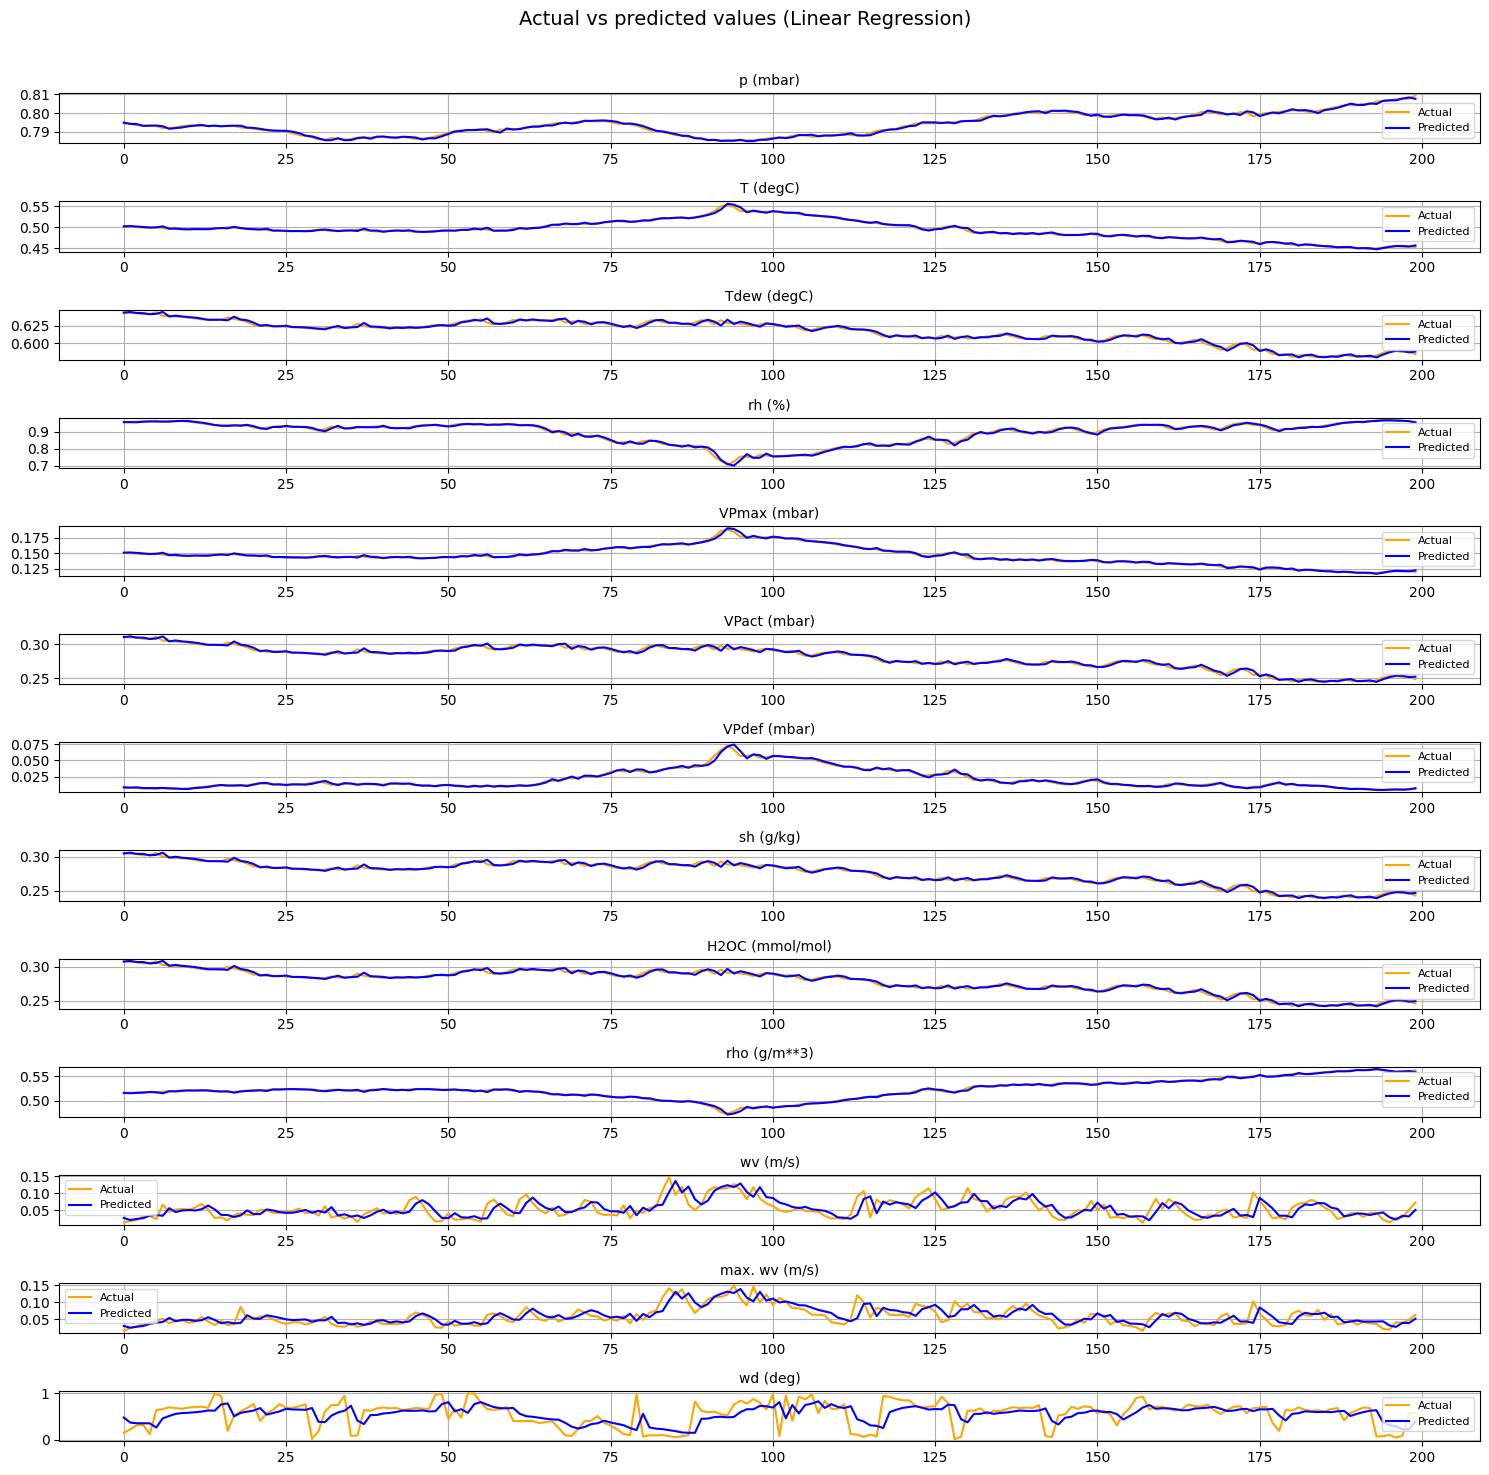

In [19]:
# Ewaluacja
print("TRAIN: MAE=%.4f MSE=%.4f RMSE=%.4f R2=%.4f" % (mae_train, mse_train, rmse_train, r2_train))
print("TEST:  MAE=%.4f MSE=%.4f RMSE=%.4f R2=%.4f" % (mae_test, mse_test, rmse_test, r2_test))

# Predykcje do wykresów
y_pred = y_pred_test

# --- Wykresy ---
NUMERIC_COLS = [
    "p (mbar)",
    "T (degC)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)"
]

n_features = len(NUMERIC_COLS)
n_rows, n_cols = n_features, 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()

for i in range(n_features):
    ax = axes[i]
    ax.plot(y_test[:200, i], label="Actual", color='orange')
    ax.plot(y_pred[:200, i], label="Predicted", color='blue')
    ax.set_title(NUMERIC_COLS[i], fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(True)

fig.suptitle("Actual vs predicted values (Linear Regression)", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()